# Neural Network with Single Hidden Layer

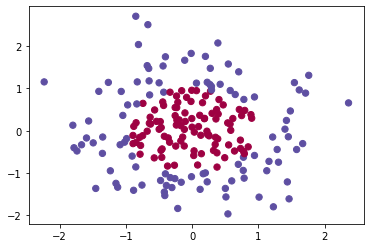

In [161]:
import sklearn

def load_extra_datasets():  
  N = 200
  gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
  return  gaussian_quantiles
  
gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
# Sigmoid function

def sigmoid(z):

  val = 1/(1+np.exp(-z))

  return val

In [137]:
# Layer size

def layer_size(X,Y):

  n_x = X.shape[0]
  n_y = Y.shape[0]
  n_h = 4

  return (n_x, n_h, n_y)

In [138]:
# Initialize parameters

def init_params(n_x, n_h, n_y):

  W1 = np.random.randn(n_h, n_x) * 0.01
  b1 = np.zeros(shape=(n_h, 1))
  W2 = np.random.randn(n_y, n_h) * 0.01
  b2 = np.zeros(shape=(n_y,1))

  params = {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2}

  return params

In [139]:
# Forward Propagation

def forward_propagation(X, params):

  W1 = params["W1"]
  b1 = params["b1"]
  W2 = params["W2"]
  b2 = params["b2"]

  Z1 = np.dot(W1,X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)

  cache = {"Z1": Z1,
           "A1": A1,
           "Z2": Z2,
           "A2": A2
           }

  return A2, cache

In [140]:
# Cost function
def cost_computation(A2, Y):

  m = Y.shape[1]

  cost = (-1/m) * np.sum( np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y) )

  cost = float(np.squeeze(cost))

  return cost

In [146]:
# Backward propagation

def backward_propagation(params, cache, X, Y):

  m = X.shape[1]

  W1 = params["W1"]
  W2 = params["W2"]

  A1 = cache["A1"]
  A2 = cache["A2"]

  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2, A1.T)
  db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1,2))
  dW1 = (1/m) * np.dot(dZ1, X.T)
  db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims= True)

  grads = {"dW1": dW1,
           "db1": db1,
           "dW2": dW2,
           "db2": db2}
  
  return grads


In [142]:
# update parameters

def update_parameters(params, grads, alpha=1.2):

  W1 = params["W1"]
  b1 = params["b1"]
  W2 = params["W2"]
  b2 = params["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - alpha*dW1
  b1 = b1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2

  params = {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2}

  return params

In [143]:
# Predict
def predict(params, X):

  A2, cache = forward_propagation(X, params)
  prediction = (A2 > 0.5)

  return prediction

In [154]:
# final model
def nn_model(X, Y, n_h, num_iterations):

  n_x = layer_size(X, Y)[0]
  n_y = layer_size(X, Y)[2]

  # initialize parameters
  params = init_params(n_x, n_h, n_y)

  for i in range(0, num_iterations):

    # forward propagation
    A2, cache = forward_propagation(X, params)

    # cost function
    cost = cost_computation(A2, Y)

    # backward propagation
    grads = backward_propagation(params, cache, X, Y)

    # update parameters
    params = update_parameters(params, grads)

    if i%1000 == 0:
      print("cost after iteration %i: %f" %(i,cost))

  # predict
  Y_prediction = predict(params, X)
  print ('Accuracy: %d' % float((np.dot(Y,Y_prediction.T) + np.dot(1-Y,1-Y_prediction.T))/float(Y.size)*100) + '%')

  return params

In [164]:
# training 
nn_model(X, Y, n_h = 4, num_iterations=10000)

cost after iteration 0: 0.693149
cost after iteration 1000: 0.113201
cost after iteration 2000: 0.091686
cost after iteration 3000: 0.126371
cost after iteration 4000: 0.099855
cost after iteration 5000: 0.091938
cost after iteration 6000: 0.148253
cost after iteration 7000: 0.109323
cost after iteration 8000: 0.088088
cost after iteration 9000: 0.103545
Accuracy: 97%


{'W1': array([[ 3.84221229, -1.15490117],
        [ 0.92859828, -2.98534076],
        [ 2.16157087,  2.79694972],
        [ 0.15329392, -0.05955639]]),
 'W2': array([[-15.72469556,  16.47239343,  16.51329372,  -7.89743273]]),
 'b1': array([[ 2.38146697],
        [-1.60458292],
        [-2.40416643],
        [-2.48618199]]),
 'b2': array([[11.86523313]])}